In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Visualisasi Eksperimen Algoritma Pembelajaran

In [29]:
ppo = pd.read_csv("~/ray_results/HWalk_Low_Mimic/PPO_HumanoidBulletEnv-v0-Low_166df_00000_0_2021-04-25_19-33-42/progress.csv")
pg = pd.read_csv("~/ray_results/HWalk_Low_Mimic/PG_HumanoidBulletEnv-v0-Low_14b1b_00000_0_2021-04-27_16-10-51/progress.csv")
pg2 = pd.read_csv("~/ray_results/HWalk_Low_Mimic/PG_HumanoidBulletEnv-v0-Low_d6346_00000_0_2021-04-26_09-07-57/progress.csv")
a2c = pd.read_csv("~/ray_results/HWalk_Low_Mimic/A2C_HumanoidBulletEnv-v0-Low_7dbb0_00000_0_2021-04-27_17-25-22/progress.csv")
a2c2 = pd.read_csv("~/ray_results/HWalk_Low_Mimic/A2C_HumanoidBulletEnv-v0-Low_f2fa8_00000_0_2021-04-26_20-50-16/progress.csv")

In [30]:
ppo_10M = ppo[ppo['timesteps_total'] <= 10000000]
ppo_reward_mean = ppo_10M['episode_reward_mean']
ppo_eps_len_mean = ppo_10M['episode_len_mean']

pg_10M = pg[pg['timesteps_total'] <= 10000000]
pg_reward_mean = pg_10M['episode_reward_mean']
pg_eps_len_mean = pg_10M['episode_len_mean']

a2c_10M = a2c[a2c['timesteps_total'] <= 10000000]
a2c_reward_mean = a2c_10M['episode_reward_mean']
a2c_eps_len_mean = a2c_10M['episode_len_mean']

pg_10M_2 = pg2[pg2['timesteps_total'] <= 10000000]
pg_reward_mean_2 = pg_10M_2['episode_reward_mean']
pg_eps_len_mean_2 = pg_10M_2['episode_len_mean']

a2c_10M_2 = a2c2[a2c2['timesteps_total'] <= 10000000]
a2c_reward_mean_2 = a2c_10M_2['episode_reward_mean']
a2c_eps_len_mean_2 = a2c_10M_2['episode_len_mean']

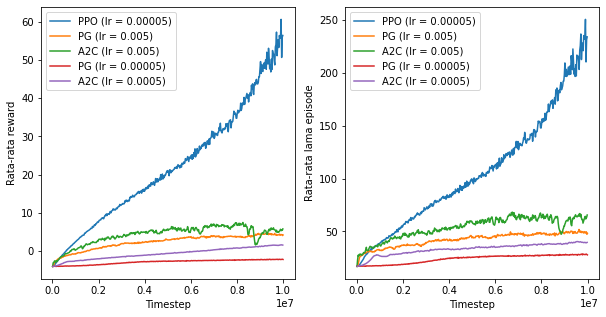

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.plot(ppo_10M['timesteps_total'], ppo_reward_mean)
ax1.plot(pg_10M['timesteps_total'], pg_reward_mean)
ax1.plot(a2c_10M['timesteps_total'], a2c_reward_mean)
ax1.plot(pg_10M_2['timesteps_total'], pg_reward_mean_2)
ax1.plot(a2c_10M_2['timesteps_total'], a2c_reward_mean_2)
ax1.set_xlabel('Timestep')
ax1.set_ylabel('Rata-rata reward')
ax1.legend(['PPO (lr = 0.00005)', 'PG (lr = 0.005)', 'A2C (lr = 0.005)', 'PG (lr = 0.00005)', 'A2C (lr = 0.0005)'])

ax2.plot(ppo_10M['timesteps_total'], ppo_eps_len_mean)
ax2.plot(pg_10M['timesteps_total'], pg_eps_len_mean)
ax2.plot(a2c_10M['timesteps_total'], a2c_eps_len_mean)
ax2.plot(pg_10M_2['timesteps_total'], pg_eps_len_mean_2)
ax2.plot(a2c_10M_2['timesteps_total'], a2c_eps_len_mean_2)
ax2.set_xlabel('Timestep')
ax2.set_ylabel('Rata-rata lama episode')
ax2.legend(['PPO (lr = 0.00005)', 'PG (lr = 0.005)', 'A2C (lr = 0.005)', 'PG (lr = 0.00005)', 'A2C (lr = 0.0005)'])

fig.savefig('img/Komparasi algo.png')
plt.show()

# Visualisasi Eksperimen Agen Tunggal dan Bertingkat

In [9]:
with open("Log/experiment_data_low.json") as fp:
    data = json.load(fp)

with open("Log/experiment_data_hier2.json") as fp:
    data_hier_1 = json.load(fp)

with open("Log/experiment_data_hier3.json") as fp:
    data_hier = json.load(fp)

In [10]:
data.keys()

dict_keys(['0', '10', '20', '30', '40', '50', '60', '70', '80', '90', '100', '110', '120', '130', '140', '150', '160', '170', '180', '190', '200', '210', '220', '230', '240', '250', '260', '270', '280', '290', '300', '310', '320', '330', '340', '350'])

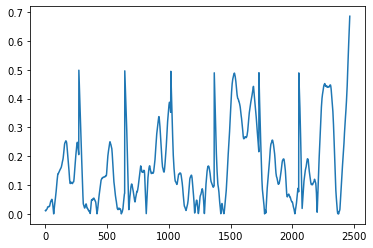

In [11]:
plt.plot(data['0']['drift'][2])

In [12]:
drift_mean = [np.mean([np.mean(x) for x in data[y]['drift']]) for y in data]
drift_mean_hier = [np.mean(data_hier[x]['drift']) for x in data_hier]
drift_mean_hier_1 = [np.mean(data_hier_1[x]['drift']) for x in data_hier_1]

In [13]:
timestep_mean = [np.mean(data[x]['timestep']) for x in data]
timestep_mean_hier = [np.mean(data_hier[x]['timestep']) for x in data_hier]
timestep_mean_hier_1 = [np.mean(data_hier_1[x]['timestep']) for x in data_hier_1]

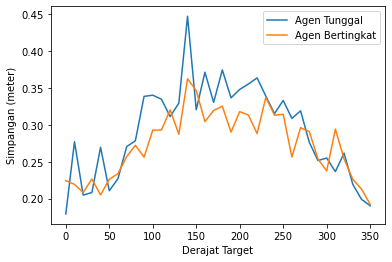

In [15]:
x_data = [10 * x for x in range(36)]
# plt.plot(x_data, drift_mean)
plt.plot(x_data, drift_mean_hier)
plt.plot(x_data, drift_mean_hier_1)
plt.xlabel('Derajat Target')
plt.ylabel('Simpangan (meter)')
plt.legend(["Agen Tunggal", "Agen Bertingkat", "Agen Bertingkat 1"])

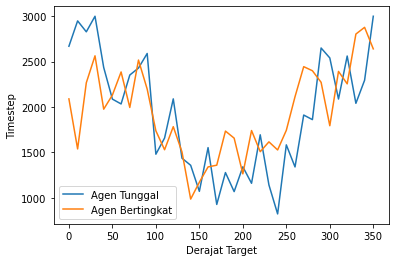

In [8]:
plt.plot(x_data, timestep_mean)
plt.plot(x_data, timestep_mean_hier)
plt.xlabel('Derajat Target')
plt.ylabel('Timestep')
plt.legend(["Agen Tunggal", "Agen Bertingkat"])